In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import pandas as pd
import mapclassify
from shapely.wkt import loads
%matplotlib inline

In [27]:
building = gpd.read_file('dim_buildings.csv')
apartments = gpd.read_file('dim_apartments.csv')
restaurants = gpd.read_file('dim_restaurants.csv')
schools = gpd.read_file('dim_schools.csv')
pubs = gpd.read_file('dim_pubs.csv')

In [28]:
employers = gpd.read_file('dim_employers.csv')
jobs = pd.read_csv('dim_jobs.csv')
employers['employerId'] = employers['employerId'].astype(int, errors = 'raise')

In [29]:
dfemp = pd.merge(employers, jobs, on=['employerId'])
dfemp.head()

,employerId,location,buildingId,geometry,jobId,hourlyRate,startTime,endTime,daysToWork,educationRequirement
0,379,POINT (-1849.997168394888 1744.6010147106394),823,None,0,10.000000,46:00.0,46:00.0,"[Monday,Tuesday,Wednesday,Thursday,Friday]",HighSchoolOrCollege
1,379,POINT (-1849.997168394888 1744.6010147106394),823,None,1,22.217633,31:00.0,31:00.0,"[Monday,Tuesday,Wednesday,Thursday,Friday]",Bachelors
2,380,POINT (41.51783767879146 418.7264799744545),154,None,2,10.000000,00:00.0,00:00.0,"[Monday,Tuesday,Wednesday,Thursday,Friday]",Bachelors
3,380,POINT (41.51783767879146 418.7264799744545),154,None,3,15.312071,39:00.0,39:00.0,"[Monday,Tuesday,Wednesday,Thursday,Friday]",Bachelors
4,381,POINT (877.2786575380362 1358.5441805909259),279,None,4,21.355409,53:00.0,53:00.0,"[Monday,Tuesday,Wednesday,Thursday,Friday]",HighSchoolOrCollege


In [30]:
building.geometry = building['location'].apply(loads)
apartments.geometry = apartments['location'].apply(loads)
restaurants.geometry = restaurants['location'].apply(loads)
schools.geometry = schools['location'].apply(loads)
pubs.geometry = pubs['location'].apply(loads)
employers.geometry = employers['location'].apply(loads)
dfemp.geometry = dfemp['location'].apply(loads)

In [31]:
apartments['rentalCost'] = apartments['rentalCost'].astype(float, errors = 'raise')
pubs['hourlyCost'] = pubs['hourlyCost'].astype(float, errors = 'raise')
restaurants['foodCost'] = restaurants['foodCost'].astype(float, errors = 'raise')
schools['monthlyCost'] = schools['monthlyCost'].astype(float, errors = 'raise')

In [32]:
bins_rental = mapclassify.Quantiles(apartments['rentalCost'].values, k=4).bins
bins_foodCost = mapclassify.Quantiles(restaurants['foodCost'].values, k=4).bins
bins_monthly = mapclassify.EqualInterval(schools['monthlyCost'].values, k=2).bins
bins_hourlyCost = mapclassify.EqualInterval(pubs['hourlyCost'].values, k=2).bins
bins_emp = mapclassify.Quantiles(dfemp['hourlyRate'].values, k=4).bins

Text(0.5, 1.0, 'GENERAL BUILDINGS AND RELATED EXPENSES')

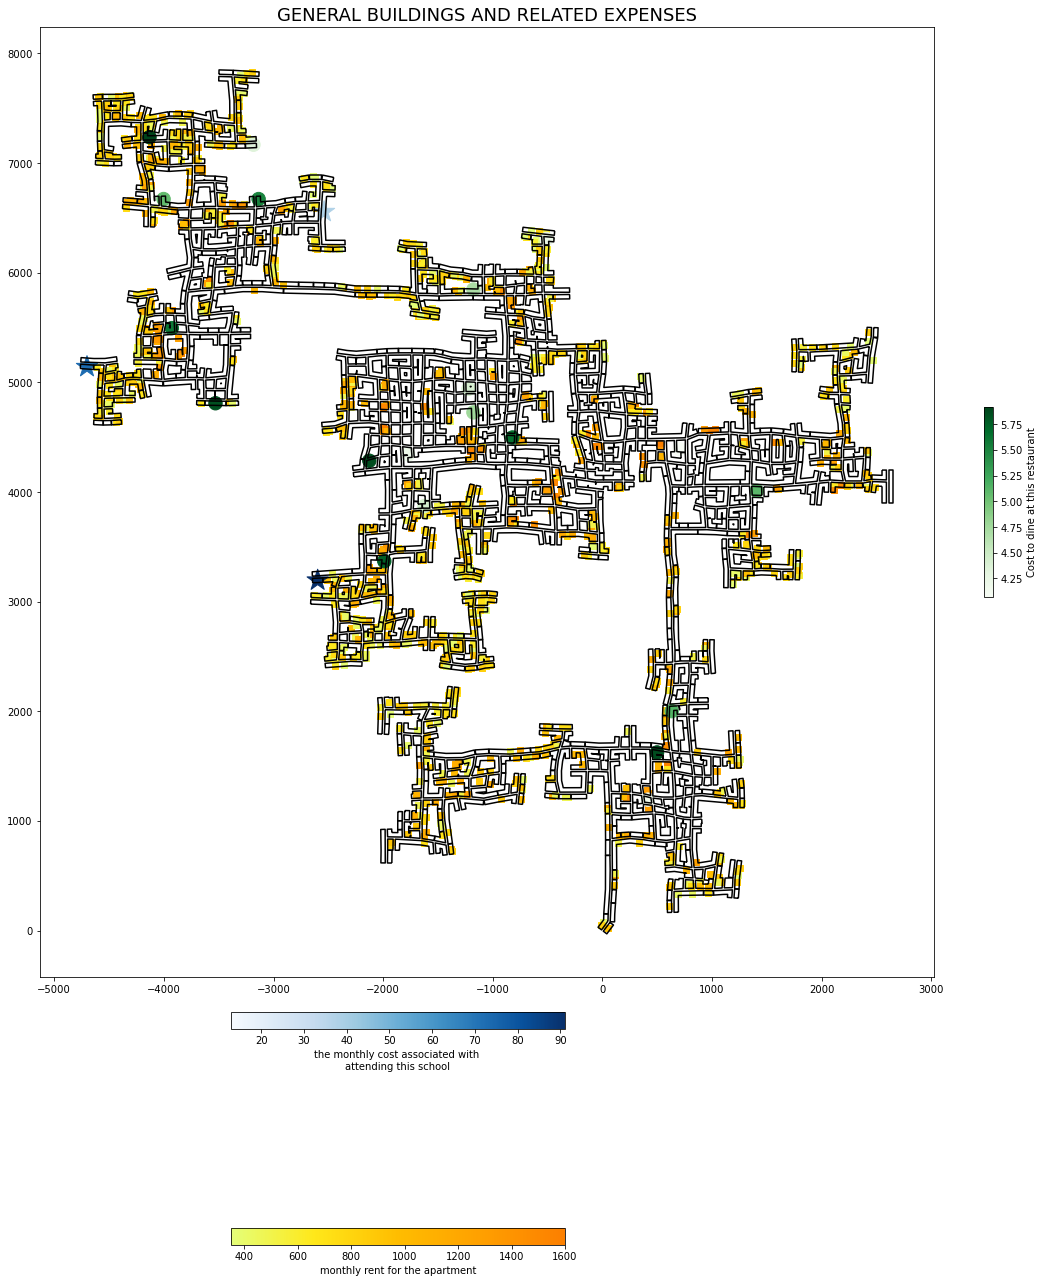

In [33]:
fig, ax = plt.subplots(figsize=(30, 26))
building.boundary.plot(ax=ax, color = 'black')
apartments.plot(ax=ax, column= apartments['rentalCost'], cmap='Wistia', marker = 's',  
    legend = True, classification_kwds=dict(bins=bins_rental), 
    legend_kwds={'shrink': 0.2, 'pad': 0.03 , 'orientation': 'horizontal', 'label': 'monthly rent for the apartment'})
schools.plot(ax=ax, column= schools['monthlyCost'], cmap='Blues', marker = '*', markersize = 500,  
    legend = True, classification_kwds=dict(bins=bins_foodCost),
    legend_kwds={'shrink': 0.2, 'pad': 0.03 , 'orientation': 'horizontal', 'label': 'the monthly cost associated with \nattending this school'})
restaurants.plot(ax=ax, column= restaurants['foodCost'], cmap='Greens', marker = 'o', markersize = 180,  
    legend = True, classification_kwds=dict(bins=bins_monthly), 
    legend_kwds={'shrink': 0.2, 'pad': 0.03, 'label': 'Cost to dine at this restaurant'})
plt.title('GENERAL BUILDINGS AND RELATED EXPENSES', fontsize = 18)

Text(0.5, 1.0, 'EMPLOYER BY HOURLY WAGE (with schools, apartment, and restaurants as references)')

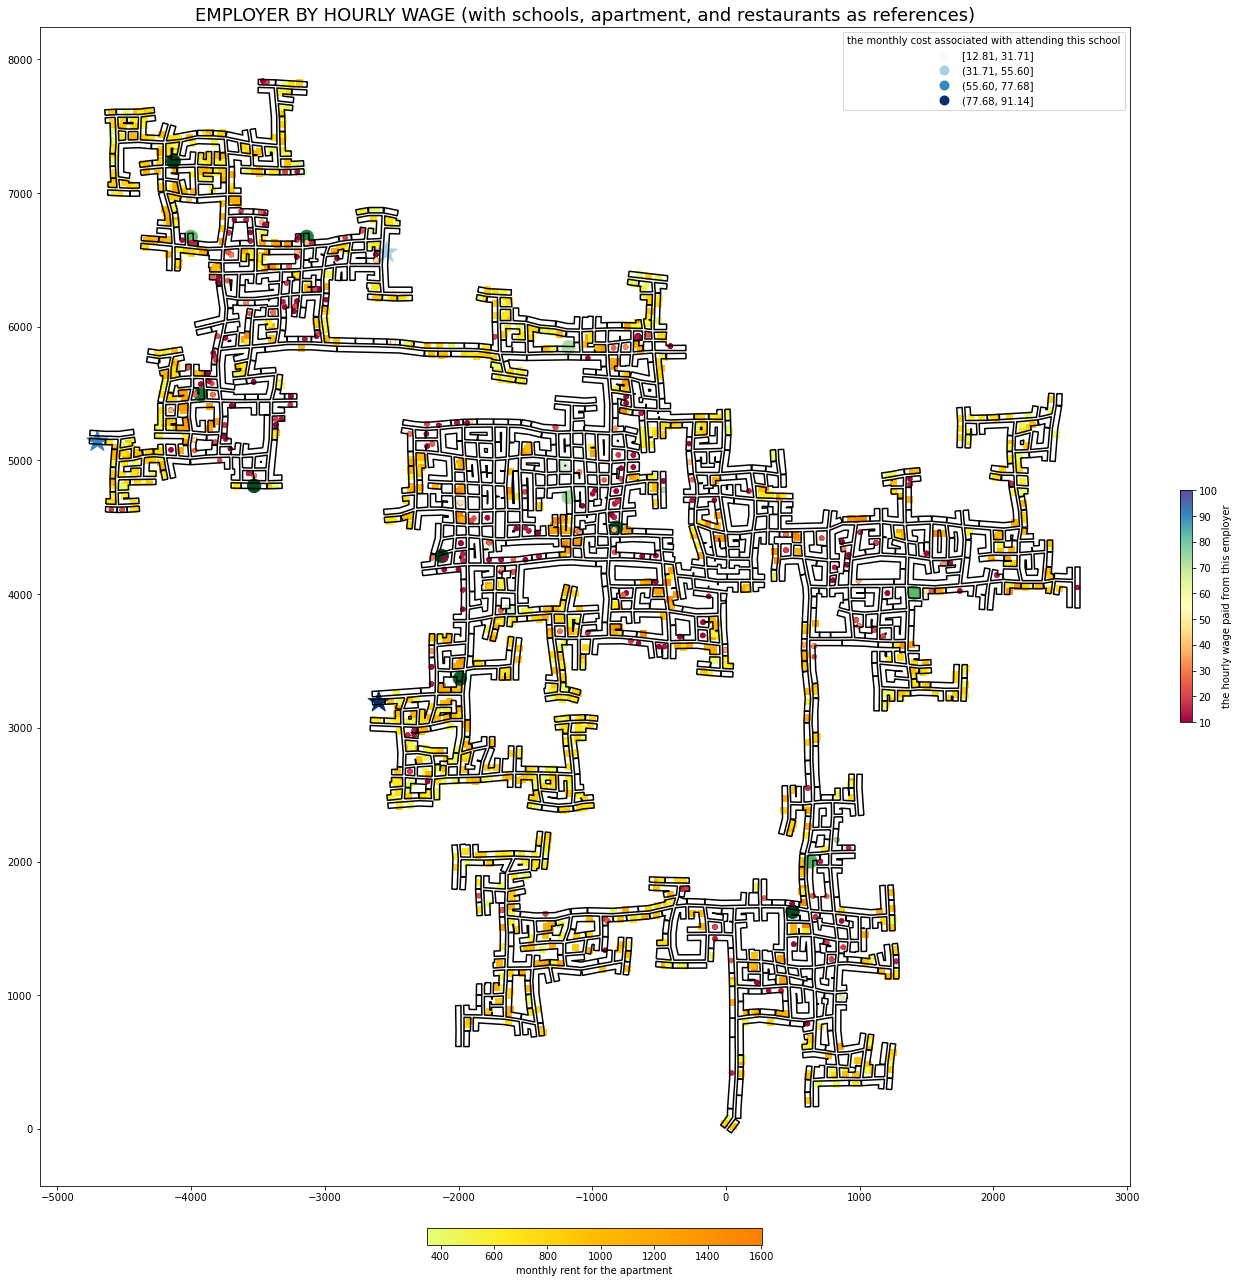

In [34]:
fig, ax = plt.subplots(figsize=(30, 26))
building.boundary.plot(ax=ax, color = 'black')
apartments.plot(ax=ax, column= apartments['rentalCost'], cmap='Wistia', marker = 's',  
    legend = True, classification_kwds=dict(bins=bins_rental), 
    legend_kwds={'shrink': 0.2, 'pad': 0.03 , 'orientation': 'horizontal', 'label': 'monthly rent for the apartment'})

schools.plot(ax=ax, column= schools['monthlyCost'], cmap='Blues', marker = '*', markersize = 500,  
    scheme='QUANTILES', k=4, legend=True, 
    legend_kwds={'bbox_to_anchor':(1,1), 'interval':True, 'title': 'the monthly cost associated with attending this school'})

restaurants.plot(ax=ax, column= restaurants['foodCost'], cmap='Greens', marker = 'o', markersize = 180, alpha = 1, 
    legend = False, classification_kwds=dict(bins=bins_foodCost),
    legend_kwds={'shrink': 0.2, 'pad': 0.03 , 'orientation': 'horizontal'})

dfemp.plot(ax=ax, column= dfemp['hourlyRate'], cmap='Spectral', marker = '.', markersize = 75,
    legend = True, classification_kwds=dict(bins=bins_emp), 
    legend_kwds={'shrink': 0.2, 'pad': 0.03 , 'label': 'the hourly wage paid from this employer'})

plt.title('EMPLOYER BY HOURLY WAGE (with schools, apartment, and restaurants as references)', fontsize = 18)

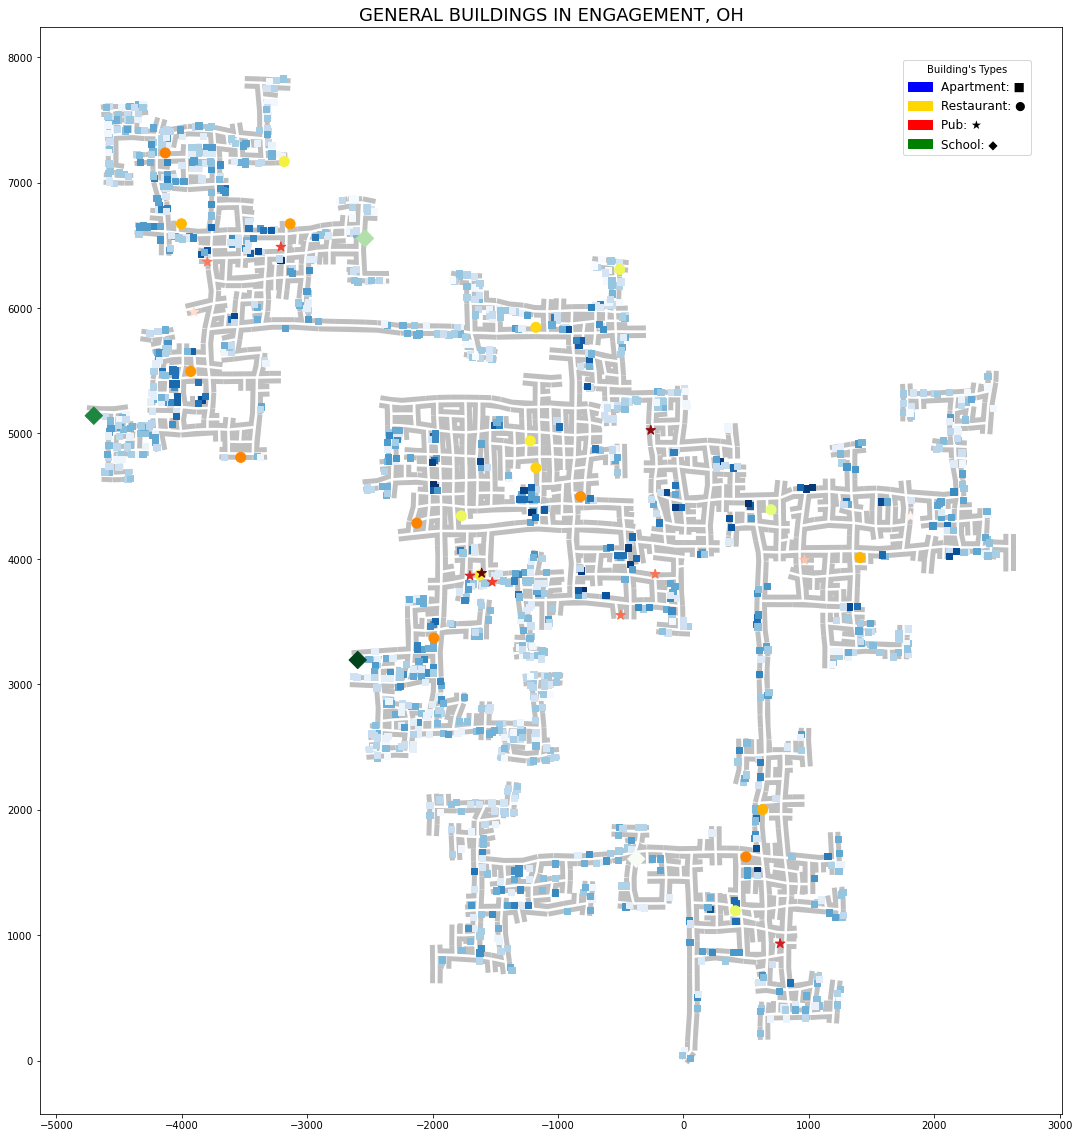

In [35]:
fig, ax = plt.subplots(figsize=(25, 20))

building.plot(ax=ax, color = 'black', alpha = 0.25)

apartments.plot(ax=ax, column= apartments['rentalCost'], cmap='Blues', marker = 's', markersize = 39)
restaurants.plot(ax=ax, column= restaurants['foodCost'], cmap='Wistia', marker = 'o', markersize = 100)
pubs.plot(ax=ax, column= pubs['hourlyCost'], cmap='Reds', marker = '*', markersize = 100)
schools.plot(ax=ax, column= schools['monthlyCost'], cmap='Greens', marker = 'D', markersize = 150)


apt_legend = mpatches.Patch(color='blue', label='Apartment: ■')
rest_legend = mpatches.Patch(color='gold', label='Restaurant: ●')
pub_legend = mpatches.Patch(color='red', label='Pub: ★')
school_legend = mpatches.Patch(color='green', label='School: ◆')

plt.legend(handles=[apt_legend, rest_legend, pub_legend, school_legend], 
    loc = 'upper right', bbox_to_anchor = (0.975, 0.975), fontsize = 12,
    title = "Building's Types")

plt.title('GENERAL BUILDINGS IN ENGAGEMENT, OH', fontsize = 18)
plt.savefig('BaseMapLocations.png', bbox_inches = 'tight', pad_inches = 0)

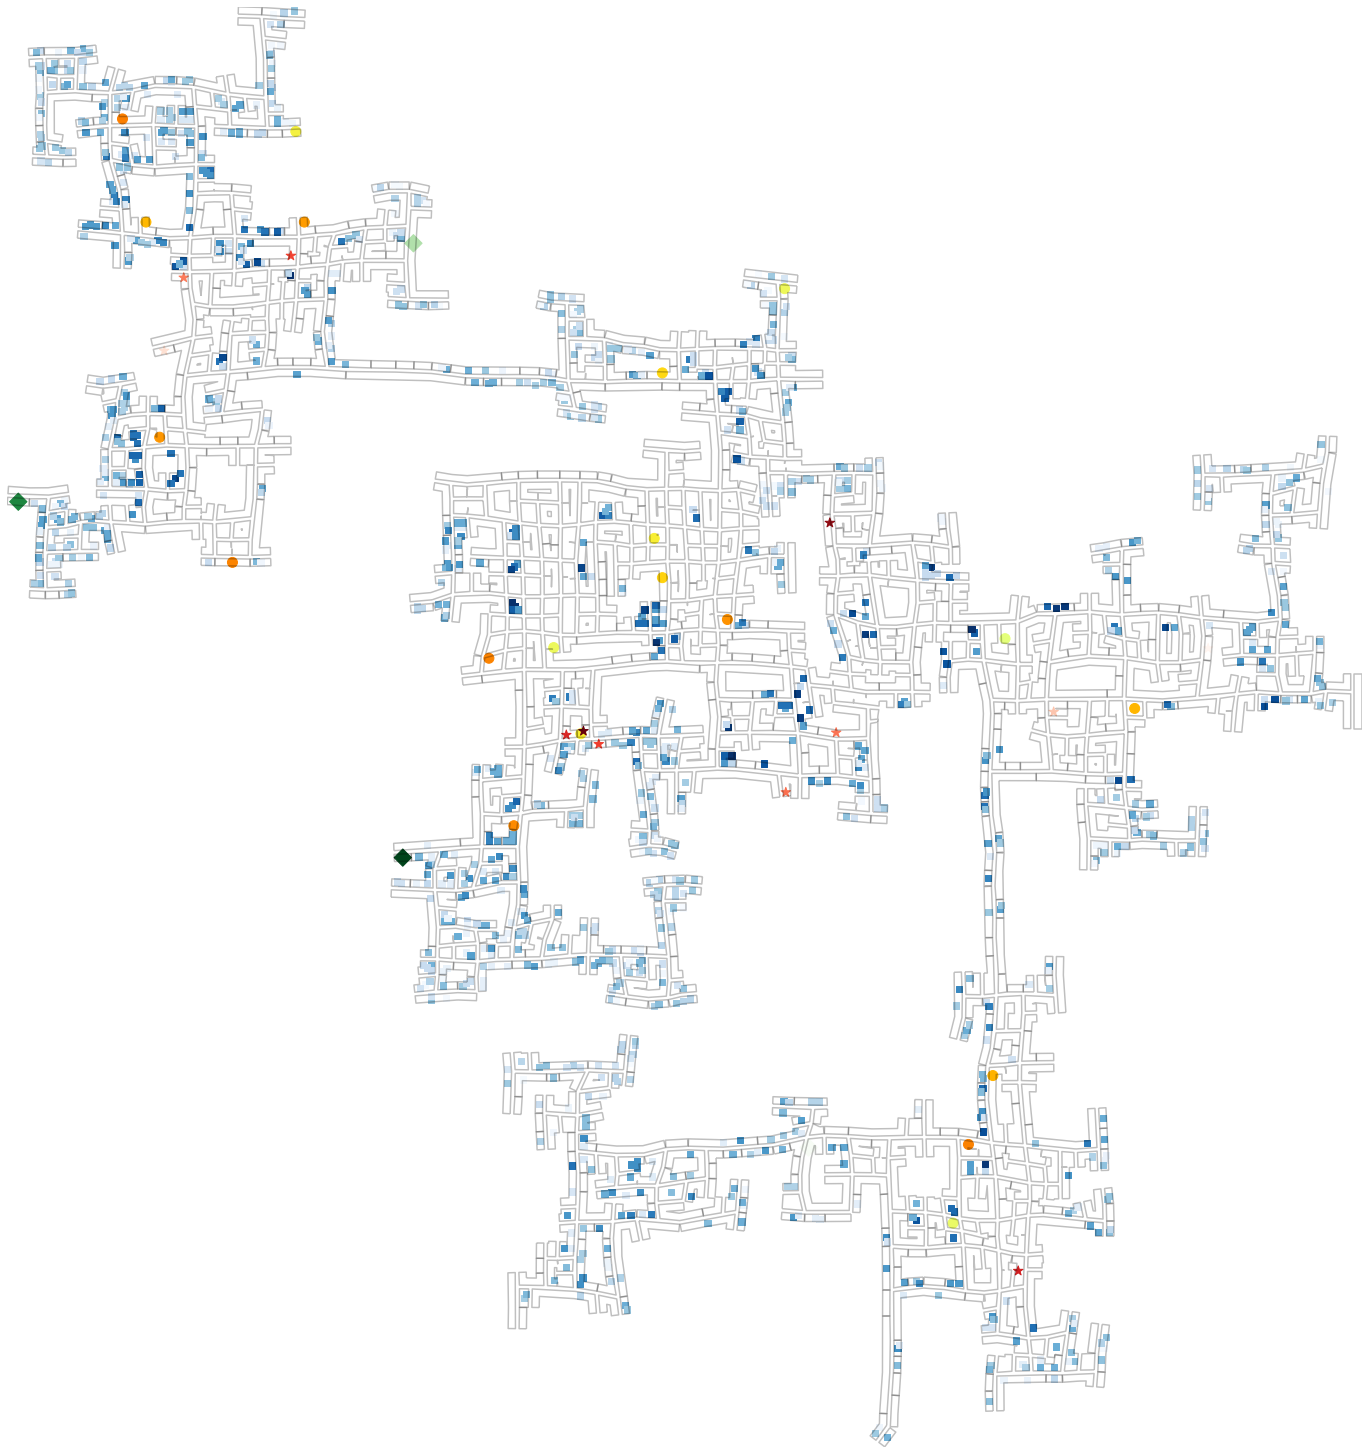

In [36]:
fig, ax = plt.subplots(figsize=(25, 20))

building.boundary.plot(ax=ax, color = 'black', alpha = 0.25)

apartments.plot(ax=ax, column= apartments['rentalCost'], cmap='Blues', marker = 's', markersize = 39)
restaurants.plot(ax=ax, column= restaurants['foodCost'], cmap='Wistia', marker = 'o', markersize = 100)
pubs.plot(ax=ax, column= pubs['hourlyCost'], cmap='Reds', marker = '*', markersize = 100)
schools.plot(ax=ax, column= schools['monthlyCost'], cmap='Greens', marker = 'D', markersize = 150)

apt_legend = mpatches.Patch(color='blue', label='Apartment: ■')
rest_legend = mpatches.Patch(color='gold', label='Restaurant: ●')
pub_legend = mpatches.Patch(color='red', label='Pub: ★')
school_legend = mpatches.Patch(color='green', label='School: ◆')

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig('BaseMapLocations_tight.png', bbox_inches = 'tight', pad_inches = 0)